In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Defining Function for Historical Data 
def Initialize(tickers,startyear,startmonth,startday,interval):
    yf.pdr_override()
    tickers=tickers
    startyear=startyear
    startmonth=startmonth
    startday=startday
    interval=interval
    start=dt.datetime(startyear,startmonth,startday,)
    now=dt.datetime.now()
    df=pdr.get_data_yahoo(tickers,start,now, interval=interval,)
    df.drop(['High', 'Low','Open','Close','Volume'], axis=1, inplace=True)
    df.columns = df.columns.droplevel(0)
    return df

In [3]:
#Creation of new Dataframe as per provided details
df=Initialize(tickers=['GOOGL', 'AAPL','MSFT','GOOG','F','MS'],
           startyear=2020,
           startmonth=7,
           startday=1,
           interval="1d")

[*********************100%***********************]  6 of 6 completed


In [4]:
#Creation of new Dataframe for returns of securities
df2=df.pct_change()
df2.dropna(inplace=True)
print(df2.head())

                AAPL         F      GOOG     GOOGL        MS      MSFT
Date                                                                  
2020-07-01 -0.001892 -0.016447  0.017282  0.016889 -0.014286  0.005847
2020-07-02  0.000000  0.011706  0.018539  0.019369  0.003781  0.007621
2020-07-06  0.026750  0.023140  0.021165  0.020219  0.021553  0.021526
2020-07-07 -0.003103 -0.011309 -0.007033 -0.006488 -0.027243 -0.011628
2020-07-08  0.023290 -0.004902  0.007285  0.009182  0.029901  0.021993


In [5]:
#Er Portfolio Expected Return
#std Portfolio Standard Deviation
#Var Portfolio Variance
Er=np.array(df2.describe().loc['mean'])
std=np.array(df2.describe().loc['std'])
var=std**2

In [6]:
#varcovar1 is the variance covariance matrix, it is created by correlation of the return of securities matrix
varcovar1=df2.cov()

In [7]:
#Defining formulas of Portfolios weight, Variance and Standard Deviation
#Weight of Efficient Portfolio(W)=(Inverse of varcovar1*((Portfolio Expected Return)-(Constant(C)))/(Summation of numberator)

#For Efficient Portfolio A Constant(c1)=0
c1=0
weightA=np.linalg.inv(varcovar1) @ (Er-c1) / np.sum(np.linalg.inv(varcovar1) @ (Er-c1))
ErA=weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

#For Efficient Portfolio B Constant(c2)=0.04
c2=0.04
weightB=np.linalg.inv(varcovar1) @ (Er-c2) / np.sum(np.linalg.inv(varcovar1) @ (Er-c2))
ErB=weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

In [8]:
#Covariance of Portfolio A & B (covAB)
#covAB=(weightA*varcovar1*(Transpose of weightB))
covAB=weightA@varcovar1@weightB.T

In [9]:
#Creating array of weights for Portfolio A and B
wa=np.linspace(-1.5,4.5,num=100)
wb=1-wa

In [10]:
#Creating new Portfolio C and calculating Expected return of Portfolio C
#Expected Return of Portfolio C= wa*ErA + wb*ErB
ErC=wa*ErA + wb*ErB

In [11]:
#Calculating Standard Deviation of C
#standard Deviation of Portfolio C=np.sqrt((wa*stdA)**2 + (wb*stdB)**2 + 2*wa*wb*covAB)
stdC=np.sqrt((wa*stdA)**2 + (wb*stdB)**2 + 2*wa*wb*covAB)

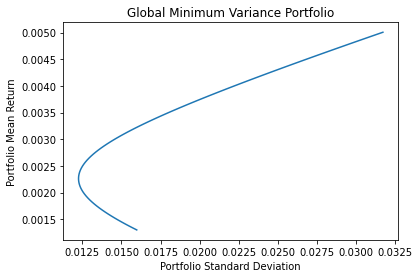

In [12]:
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Mean Return")
plt.title("Global Minimum Variance Portfolio")
plt.plot(stdC,ErC)
plt.show()